In [79]:
# 1. Import packages
import logging
import tempfile
from pprint import pprint
from collections.abc import Sequence
from typing import Union

import amici
import matplotlib as mpl
import numpy as np
import petab

import pypesto.optimize as optimize
import pypesto.petab
import pypesto.profile as profile
import pypesto.sample as sample
import pypesto.store as store
import pypesto.visualize as visualize
import pypesto.visualize.model_fit as model_fit

from pypesto.profile import calculate_approximate_ci, chi2_quantile_to_ratio
from pypesto.result import Result

import matplotlib.axes
import matplotlib.pyplot as plt
import numpy as np

# Set seed for reproducibility
np.random.seed(1912)

In [80]:
# 2. Import the model
model_name = "Boehm_JProteomeRes2014"
petab_yaml = f"../../models/{model_name}/{model_name}.yaml"

petab_problem = petab.Problem.from_yaml(petab_yaml)
importer = pypesto.petab.PetabImporter(petab_problem)
problem = importer.create_problem(verbose=False)

In [197]:
# 3. Setup optimizers
optimizer_options = {"maxiter": 1e4, "fatol": 1e-12, "frtol": 1e-12}
optimizer = optimize.FidesOptimizer(options=optimizer_options, verbose=logging.WARN)
optimizer_scipy_lbfgsb = optimize.ScipyOptimizer(method="L-BFGS-B")
optimizer_scipy_powell = optimize.ScipyOptimizer(method="Powell")

opt_options = optimize.OptimizeOptions()

n_starts = 2
engine = pypesto.engine.SingleCoreEngine()

In [198]:
# 4. Minimize
result = optimize.minimize(
    problem=problem,
    optimizer=optimizer_scipy_lbfgsb,
    n_starts=n_starts,
    engine=engine,
    options=opt_options,
)

100%|██████████| 2/2 [00:13<00:00,  6.57s/it]


In [200]:
res = result.optimize_result.as_list()[1]
res

{'id': '0',
 'x': array([-1.45035445,  3.69236283, -1.92159592, -1.80406735, -1.8974939 ,
         3.96596721,  0.693     ,  0.54194995,  0.8524631 ,  1.00050434,
         0.107     ]),
 'fval': 156.34086584161074,
 'grad': array([-3.22856080e-04, -2.18968089e-05, -1.69733912e-04,  2.02464251e-04,
        -3.28560722e-04,  1.78148280e-03,             nan,  6.24480539e-04,
         1.72388344e-04,  1.27974274e-04,             nan]),
 'hess': None,
 'res': None,
 'sres': None,
 'n_fval': 98,
 'n_grad': 98,
 'n_hess': 0,
 'n_res': 0,
 'n_sres': 0,
 'x0': array([-4.01268137,  2.55286839, -0.11791459, -1.53186333, -4.54171971,
         1.88975495,  0.693     , -1.94952623, -0.67531328, -1.19365571,
         0.107     ]),
 'fval0': 228597211.3740383,
 'history': <pypesto.history.base.CountHistory at 0x7fcbb43fd700>,
 'exitflag': 0,
 'time': 4.0556557178497314,
 'message': 'CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH',
 'optimizer': "<ScipyOptimizer method=L-BFGS-B options={'disp': F

In [199]:
res = result.optimize_result.as_list()[0]
res

{'id': '1',
 'x': array([-1.61858363,  4.99984878,  0.06613037, -1.58800256,  5.        ,
         4.1359167 ,  0.693     ,  0.93089463,  0.69594855,  0.58476783,
         0.107     ]),
 'fval': 149.58782918274096,
 'grad': array([-4.46256902e-04, -3.06375476e-06, -4.98179035e-04, -1.33820467e-04,
        -1.09855793e-05, -1.90895672e-03,             nan,  1.90389448e-03,
        -2.99069178e-05, -1.96291498e-03,             nan]),
 'hess': None,
 'res': None,
 'sres': None,
 'n_fval': 188,
 'n_grad': 188,
 'n_hess': 0,
 'n_res': 0,
 'n_sres': 0,
 'x0': array([-1.6637002 ,  4.53945391,  2.0209994 ,  0.63129853, -4.74870318,
         1.05971421,  0.693     , -3.53472066,  3.49967548,  4.99794198,
         0.107     ]),
 'fval0': 509396817412.3761,
 'history': <pypesto.history.base.CountHistory at 0x7fcbb43f8e60>,
 'exitflag': 0,
 'time': 9.052470207214355,
 'message': 'CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH',
 'optimizer': "<ScipyOptimizer method=L-BFGS-B options={'disp': 

In [184]:
res = result.optimize_result.as_list()[0]

x_nominal = np.array(np.log10(petab_problem.parameter_df["nominalValue"]))
new_res = pypesto.OptimizerResult(
    id="new",
    x=x_nominal,  
    fval=problem.objective(x_nominal[0:9]),
    optimizer=res['optimizer']
)
new_res

{'id': 'new',
 'x': array([-1.56891759, -4.99970489, -2.20969878, -1.78600655,  4.99011401,
         4.19773549, -0.15926677,  0.58575527,  0.81898282,  0.4986844 ,
        -0.97061622]),
 'fval': 362.40196955539363,
 'grad': None,
 'hess': None,
 'res': None,
 'sres': None,
 'n_fval': None,
 'n_grad': None,
 'n_hess': None,
 'n_res': None,
 'n_sres': None,
 'x0': None,
 'fval0': None,
 'history': None,
 'exitflag': None,
 'time': None,
 'message': None,
 'optimizer': "<ScipyOptimizer method=L-BFGS-B options={'disp': False, 'maxfun': 1000}>",
 'free_indices': None,
 'inner_parameters': None,
 'spline_knots': None}

In [185]:
result.optimize_result.append(new_res)

In [186]:
print(result.optimize_result.summary())

TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

In [216]:
result.optimize_result.as_list()[1]

{'id': '0',
 'x': array([-1.45035445,  3.69236283, -1.92159592, -1.80406735, -1.8974939 ,
         3.96596721,  0.693     ,  0.54194995,  0.8524631 ,  1.00050434,
         0.107     ]),
 'fval': 156.34086584161074,
 'grad': array([-3.22856080e-04, -2.18968089e-05, -1.69733912e-04,  2.02464251e-04,
        -3.28560722e-04,  1.78148280e-03,             nan,  6.24480539e-04,
         1.72388344e-04,  1.27974274e-04,             nan]),
 'hess': None,
 'res': None,
 'sres': None,
 'n_fval': 98,
 'n_grad': 98,
 'n_hess': 0,
 'n_res': 0,
 'n_sres': 0,
 'x0': array([-4.01268137,  2.55286839, -0.11791459, -1.53186333, -4.54171971,
         1.88975495,  0.693     , -1.94952623, -0.67531328, -1.19365571,
         0.107     ]),
 'fval0': 228597211.3740383,
 'history': <pypesto.history.base.CountHistory at 0x7fcbb43fd700>,
 'exitflag': 0,
 'time': 4.0556557178497314,
 'message': 'CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH',
 'optimizer': "<ScipyOptimizer method=L-BFGS-B options={'disp': F

In [217]:
# 5. Profile
result = pypesto.profile.parameter_profile(
    problem=problem,
    result=result,
    optimizer=optimizer_scipy_lbfgsb,
    engine=engine,
    result_index=1,
    profile_index=[0]
)

100%|██████████| 1/1 [00:00<00:00, 762.05it/s]


In [222]:
result.profile_result.list[2]

[{'x_path': array([[-1.45035445],
         [ 3.69236283],
         [-1.92159592],
         [-1.80406735],
         [-1.8974939 ],
         [ 3.96596721],
         [ 0.693     ],
         [ 0.54194995],
         [ 0.8524631 ],
         [ 1.00050434],
         [ 0.107     ]]),
  'fval_path': array([156.34086584]),
  'ratio_path': array([0.00116733]),
  'gradnorm_path': array([nan]),
  'exitflag_path': array([0]),
  'time_path': array([0.]),
  'color_path': array([[1, 0, 0, 1]]),
  'time_total': 0.0,
  'n_fval': 0,
  'n_grad': 0,
  'n_hess': 0,
  'message': None},
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [204]:
# 6. Print the CIs
def profile_cis(
    result: Result,
    confidence_level: float = 0.95,
    profile_indices: Sequence[int] = None,
    profile_list: int = 0,
    color: Union[str, tuple] = "C0",
    show_bounds: bool = False,
    ax: matplotlib.axes.Axes = None,
) -> matplotlib.axes.Axes:
    """
    Plot approximate confidence intervals based on profiles.

    Parameters
    ----------
    result:
        The result object after profiling.
    confidence_level:
        The confidence level in (0,1), which is translated to an approximate
        threshold assuming a chi2 distribution, using
        `pypesto.profile.chi2_quantile_to_ratio`.
    profile_indices:
        List of integer values specifying which profiles should be plotted.
        Defaults to the indices for which profiles were generated in profile
        list `profile_list`.
    profile_list:
        Index of the profile list to be used.
    color:
        Main plot color.
    show_bounds:
        Whether to show, and extend the plot to, the lower and upper bounds.
    ax:
        Axes object to use. Default: Create a new one.
    """
    # extract problem
    problem = result.problem
    # extract profile list
    profile_list = result.profile_result.list[profile_list]

    if profile_indices is None:
        profile_indices = [ix for ix, res in enumerate(profile_list) if res]

    if ax is None:
        fig, ax = plt.subplots()

    confidence_ratio = chi2_quantile_to_ratio(confidence_level)

    # calculate intervals
    res = []
    intervals = []
    for i_par in range(problem.dim_full):
        if i_par not in profile_indices:
            continue
        xs = profile_list[i_par].x_path[i_par]
        ratios = profile_list[i_par].ratio_path
        lb, ub = calculate_approximate_ci(
            xs=xs, ratios=ratios, confidence_ratio=confidence_ratio
        )
        res.append((problem.x_names[i_par], (lb, ub)))
        intervals.append((lb, ub))

    x_names = [problem.x_names[ix] for ix in profile_indices]

    for ix, (lb, ub) in enumerate(intervals):
        ax.plot([lb, ub], [ix + 1, ix + 1], marker="|", color=color)

    parameters_ind = np.arange(1, len(intervals) + 1)
    ax.set_yticks(parameters_ind)
    ax.set_yticklabels(x_names)
    ax.set_ylabel("Parameter")
    ax.set_xlabel("Parameter value")

    if show_bounds:
        lb = problem.lb_full[profile_indices]
        ax.plot(lb, parameters_ind, "k--", marker="+")
        ub = problem.ub_full[profile_indices]
        ax.plot(ub, parameters_ind, "k--", marker="+")

    return res, fig, ax

Nominal values of parameters:
parameterId
Epo_degradation_BaF3   -1.568918
k_exp_hetero           -4.999705
k_exp_homo             -2.209699
k_imp_hetero           -1.786007
k_imp_homo              4.990114
k_phos                  4.197735
ratio                  -0.159267
sd_pSTAT5A_rel          0.585755
sd_pSTAT5B_rel          0.818983
sd_rSTAT5A_rel          0.498684
specC17                -0.970616
Name: nominalValue, dtype: float64
Epo_degradation_BaF3 , CI is  (np.float64(-1.735525095083418), np.float64(-1.313228398151176))


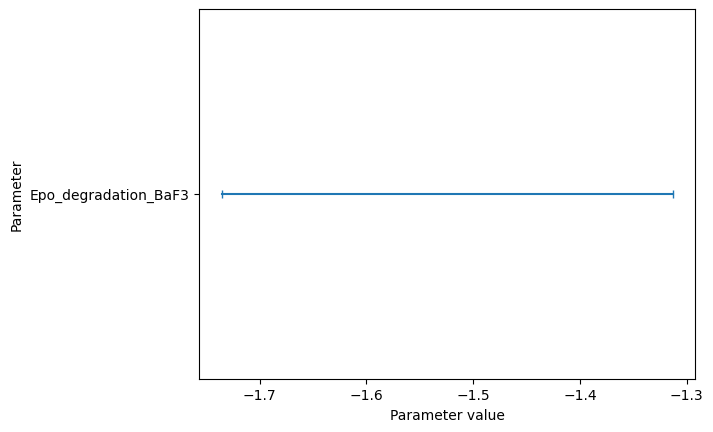

In [213]:
res, fig, ax = profile_cis(result, profile_list=0)

print("Nominal values of parameters:")
print(np.log10(petab_problem.parameter_df["nominalValue"]))

for (param, (lb, ub)) in res:
    print(param, ", CI is ", (lb, ub))

In [ ]:
result.profile_result.list[0][4]['x_path'][0]

array([-1.38386757, -1.40881507, -1.43050954, ..., -1.56905677,
       -1.56905128, -1.56904594], shape=(5595,))